## Network Science Lab 5

### Numerical solution of an initial value problem

You will now use *odeint* from scipy.integrate to solve the following IVP:

$\frac{dy_1}{dt} =  sin( \omega t) $

$\frac{dy_2}{dt} = y_1 - y_2$

$y_1(0)=1, ~ y_2(0)=0$

and $\omega$ is a parameter that must be specified

1) Create a function named RHS which takes y,t, and $\omega$ as input and returns dy/dt. Note that y and dy/dt should each contain two elements

In [9]:
import numpy as np
#Add code here
def RHS(y,t,w): 
    return [np.sin(w * t), y[0] - y[1]]

2) Now, (a) set the variable, y0, to the initial condition, (b) assign a value to $\omega$, and (c) create an array of times, t (starting at zero) at which the solution will be computed

In [51]:
#Add code here
y0 = [0, 0]
w = 0.5
t = np.linspace(0, 1, 1000)

3) If the previous tasks have been completed correctly, the code below will solve the IVP and return the solution in the array, y

In [52]:
%pylab inline
from scipy.integrate import odeint
y = odeint(RHS, y0, t, args=(w,))

Populating the interactive namespace from numpy and matplotlib


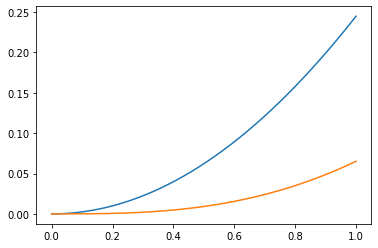

In [53]:
import matplotlib.pyplot as plt
plt.figure()
plot(t, y)
plt.show()

4) What are the dimensions of y? Plot your solution for $y_i(t)$. Compute the error, $\epsilon(t) = |y_1-y_{1,exact}|$. Is it what you expect? Can you reduce it? For this last question, it may be helpful to look at the online documentation for *odeint*. 

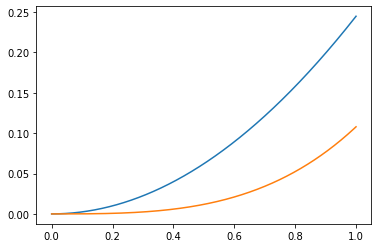

In [54]:
#Add code here
y1_exact = lambda t: - np.cos(w * t) / w + 1 / w
y2_exact = lambda t: (np.cos(w * t) - w * np.sin(w * t) - w**2 - 1) / (w**3 + w) + (w**2 * np.exp(t)) / (w**3 + w) 
plt.figure()
plt.plot(t, y1_exact(t))
plt.plot(t, y2_exact(t))
plt.show()

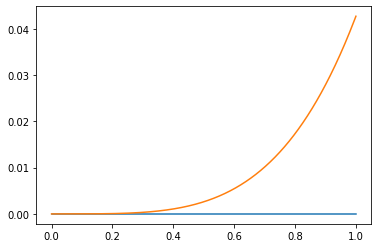

In [55]:
# Errors
plt.figure()
plt.plot(t, np.abs(y1_exact(t) - y[:, 0]))
plt.plot(t, y2_exact(t) - y[:, 1])
plt.show()